Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list anyone you collaborated with on this workbook

---

## Lab 4: Visualization

Welcome to your fourth lab of the semester!<br>

This lab aims to get you started with visualization in Python.

### Learning objectives:
At the end of this lab, you should be able to
* apply principles of scale, conditioning, perception, transformation, context, and smoothing to critique data visualizations
* refine your ability to do exploratory data analysis
* develop an understanding for how plot parameters can be adjusted to influence scale, conditioning, perception, transformation, context, and smoothing.

## Question 0: Critique a real-world visualization

Let's start by looking at some example figures. Please find at least one data visualization (graph, chart, or animation). This can be something from popular media, academic journals, or a creation of your own. Only requirement is that it needs to visually summarize data.

### Question 0.1 (1 pt)
Please provide the URL or other reference to your figure of choice.

*YOUR ANSWER HERE*

### Question 0.2 (1 pt)
What does this visualization show? Is there a message that's being conveyed with the visualization? If so, what is it?

*YOUR ANSWER HERE*

### Question 0.3 (2 pts)
What do you like about this figure? What can be improved? As much as possible, frame your answer in terms of the visualization principles we learned in lecture (scale, conditioning, perception, transformation, context, and smoothing). 

*YOUR ANSWER HERE*

## Setup

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib inline

## Question 1: Understanding our data
The data from this lab comes from the Environmental Protection Agency (EPA). From the [daily air quality data tool](https://www.epa.gov/outdoor-air-quality-data/download-daily-data), we pulled PM2.5 data from 2023 for monitors in Alameda County. Let's take a look at the data in our data folder by running the cell below.

In [3]:
os.listdir('data')

['alameda_pm25_2021.csv', 'ad_viz_plotval_data.csv']

### Question 1.1 (1 pt)
Create a dataframe called `alameda_pm25` that contains the data from the .csv found in the 'data' folder.

In [4]:
# YOUR CODE HERE

In [5]:
# SOLUTION
alameda_pm25 = pd.read_csv("data/alameda_pm25_2023.csv.csv")

In [6]:
alameda_pm25.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,60010007,3,3.7,ug/m3 LC,15,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2023,AQS,60010007,3,2.7,ug/m3 LC,11,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2023,AQS,60010007,3,3.6,ug/m3 LC,15,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2023,AQS,60010007,3,2.7,ug/m3 LC,11,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2023,AQS,60010007,3,4.7,ug/m3 LC,20,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


### Question 1.2.1 (1 pt)
Use `.describe()` to summarize the data in `alameda_pm25`.

In [7]:
# YOUR CODE HERE

In [8]:
# SOLUTION
alameda_pm25.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.223000e+03,1223.0,1223.000000,1223.000000,1223.0,1223.0,1223.0,1223.0,1223.0,1223.0,1223.000000,1223.000000
mean,6.001001e+07,3.0,6.136304,25.284546,1.0,100.0,88101.0,41860.0,6.0,1.0,37.761190,-122.115135
std,2.464319e+00,0.0,3.464403,13.351688,0.0,0.0,0.0,0.0,0.0,0.0,0.055942,0.201056
min,6.001001e+07,3.0,0.300000,1.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.687526,-122.302741
25%,6.001001e+07,3.0,3.700000,15.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.701222,-122.282347
50%,6.001001e+07,3.0,5.300000,22.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.743065,-122.169935
75%,6.001001e+07,3.0,7.900000,33.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.814781,-121.903019
max,6.001002e+07,3.0,27.000000,82.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.864767,-121.784217


### Question 1.2.2 (1 pt)
You'll notice that the output of `.describe()` drops the "Date" column because it isn't a numeric type. Try running `.describe()` again, this time setting the argument `include = 'all'`.

In [9]:
#YOUR CODE HERE

In [10]:
# SOLUTION
alameda_pm25.describe(include = 'all')

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
count,1223,1223,1.223000e+03,1223.0,1223.000000,1223,1223.000000,1223,1223.0,1223.0,1223.0,1223,1223.0,1223,1223.0,1223,1223.0,1223,1223.000000,1223.000000
unique,260,2,NaN,NaN,NaN,1,NaN,6,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
top,01/01/2023,AQS,NaN,NaN,NaN,ug/m3 LC,NaN,Oakland,NaN,NaN,NaN,PM2.5 - Local Conditions,NaN,"San Francisco-Oakland-Hayward, CA",NaN,California,NaN,Alameda,NaN,NaN
freq,6,659,NaN,NaN,NaN,1223,NaN,255,NaN,NaN,NaN,1223,NaN,1223,NaN,1223,NaN,1223,NaN,NaN
mean,NaN,NaN,6.001001e+07,3.0,6.136304,NaN,25.284546,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.761190,-122.115135
std,NaN,NaN,2.464319e+00,0.0,3.464403,NaN,13.351688,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.055942,0.201056
min,NaN,NaN,6.001001e+07,3.0,0.300000,NaN,1.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.687526,-122.302741
25%,NaN,NaN,6.001001e+07,3.0,3.700000,NaN,15.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.701222,-122.282347
50%,NaN,NaN,6.001001e+07,3.0,5.300000,NaN,22.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.743065,-122.169935
75%,NaN,NaN,6.001001e+07,3.0,7.900000,NaN,33.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.814781,-121.903019


### Question 1.2.3 (2 pts)
Now, try converting the "Date" field to a `datetime` data type using `pd.to_datetime`. Then, re-run the `.describe` function, using the argument `include = all`. Does the output of `.describe` change when you do this? Why?

In [11]:
# YOUR CODE HERE

In [12]:
# SOLUTION
alameda_pm25["Date"] = pd.to_datetime(alameda_pm25["Date"])
alameda_pm25.describe(include = 'all')

/tmp/ipykernel_182/3592496045.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  alameda_pm25.describe(include = 'all')


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
count,1223,1223,1.223000e+03,1223.0,1223.000000,1223,1223.000000,1223,1223.0,1223.0,1223.0,1223,1223.0,1223,1223.0,1223,1223.0,1223,1223.000000,1223.000000
unique,260,2,NaN,NaN,NaN,1,NaN,6,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
top,2023-01-01 00:00:00,AQS,NaN,NaN,NaN,ug/m3 LC,NaN,Oakland,NaN,NaN,NaN,PM2.5 - Local Conditions,NaN,"San Francisco-Oakland-Hayward, CA",NaN,California,NaN,Alameda,NaN,NaN
freq,6,659,NaN,NaN,NaN,1223,NaN,255,NaN,NaN,NaN,1223,NaN,1223,NaN,1223,NaN,1223,NaN,NaN
first,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.001001e+07,3.0,6.136304,NaN,25.284546,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.761190,-122.115135
std,NaN,NaN,2.464319e+00,0.0,3.464403,NaN,13.351688,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.055942,0.201056
min,NaN,NaN,6.001001e+07,3.0,0.300000,NaN,1.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.687526,-122.302741
25%,NaN,NaN,6.001001e+07,3.0,3.700000,NaN,15.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.701222,-122.282347


*YOUR ANSWER HERE*

*SOLUTION*

*When we assign data type `datetime` to the "Date" field, Python is able to identify additional descriptive statistics like the first and last date - it can't do that when it's just reading a string.*

### Question 1.3 (1 pt)
What are the unique site names in `alameda_pm25`? 

In [13]:
# YOUR CODE HERE

In [14]:
# SOLUTION
alameda_pm25["Site Name"].unique()

array(['Livermore', 'Oakland', 'Oakland West', 'Laney College',
       'Berkeley- Aquatic Park', 'Pleasanton - Owens Ct'], dtype=object)

### Question 1.4 (1 pt)
On what date, and at which site, does the maximum daily mean PM 2.5 concentration occur?

In [15]:
# SCRATCH WORK HERE

In [16]:
# SOLUTION SCRATCH
alameda_pm25.loc[alameda_pm25['Daily Mean PM2.5 Concentration']==alameda_pm25['Daily Mean PM2.5 Concentration'].max()]


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
986,2023-08-30,AirNow,60010012,3,27.0,ug/m3 LC,82,Laney College,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.793624,-122.263376


*YOUR ANSWER HERE*

*SOLUTION*

*August 30, 2023, at the Laney College site.*

## Question 2: Plotting distributions
In this question, we'll create a histogram of PM2.5 Air Quality Index (AQI) for just the Livermore site measurements.

### Question 2.1 (1 pt)
Scroll to the bottom of the [EPA documentation for Air Data](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). What is AQI, how is it different than the concentration of the pollutant?

*YOUR ANSWER HERE*

*AQI is a unitless index intended to relate air pollution to health impacts. It has a range of 0-500, where 100 represents the national standard for the pollutant. AQI values below 100 are considered "satisfactory," while AQI values above 100 are considered unhealthy. AQI is not equivalent to the concentration of a given pollutant.* 

### Question 2.2 (1 pt)
Start by creating a dataframe that contains just the columns "Date", "Daily Mean PM2.5 Concentration", and 'DAILY_AQI_VALUE for Livermore, and name it `liv_25`.

In [17]:
# YOUR CODE HERE
liv_pm25 = alameda_pm25.loc[alameda_pm25["Site Name"] == "Livermore", ["Date", "Daily Mean PM2.5 Concentration",'DAILY_AQI_VALUE']]
liv_pm25

,Date,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,2023-01-01,3.7,15
1,2023-01-02,2.7,11
2,2023-01-03,3.6,15
3,2023-01-04,2.7,11
4,2023-01-05,4.7,20
...,...,...,...
243,2023-09-13,8.9,37
244,2023-09-14,8.8,37
245,2023-09-15,7.6,32
246,2023-09-16,7.5,31


### Question 2.3 (2 pts)
How many records are in `liv_25`, and what does this imply about the temporal resolution of the data? (Hint: try using the `.dt.dayofyear` and `.max()` methods on the `Date` column.)

In [18]:
# SCRATCH WORK HERE

In [19]:
# SOLUTION SCRATCH
print(liv_pm25.shape)
print(liv_pm25['Date'].dt.dayofyear.max())
liv_pm25.loc[liv_pm25['Date'].dt.dayofyear==liv_pm25['Date'].dt.dayofyear.max()]

(248, 3)
260


,Date,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
247,2023-09-17,4.5,19


*YOUR ANSWER HERE*

*There are 248 records. Since September 17th is the 260th day of the year, this implies that the data might have a daily temporal resolution but some data seems to be missing.*

We can use [plt.hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) to create a histogram of daily AQI values in Livermore. First, we'll call the function with just the `x` argument populated. Run the cell below to see what the histogram looks like.

(array([10., 79., 52., 43., 28., 20.,  8.,  5.,  0.,  3.]),
 array([ 1. ,  8.2, 15.4, 22.6, 29.8, 37. , 44.2, 51.4, 58.6, 65.8, 73. ]),
 <BarContainer object of 10 artists>)

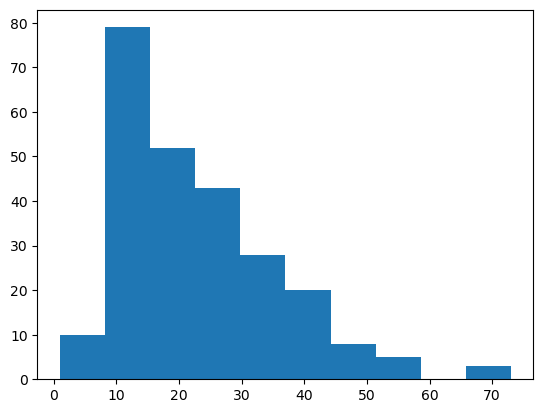

In [20]:
plt.hist(liv_pm25["DAILY_AQI_VALUE"])

Let's play around with the `bins` argument `plt.hist()`. As the documentation for `plt.hist()` outlines, `bins` can take a bunch of different datatypes - it can be an integer, or a list of integers, or even a string. Let's try all three of these possibilities below. Note the informative output from `plt.hist` that appears above the plot.

(array([89., 95., 48., 13.,  3.]),
 array([ 1. , 15.4, 29.8, 44.2, 58.6, 73. ]),
 <BarContainer object of 5 artists>)

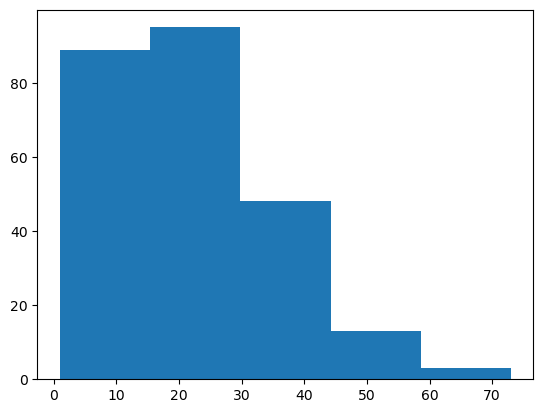

In [21]:
# setting bins to an integer
plt.hist(liv_pm25["DAILY_AQI_VALUE"], bins = 5)

(array([148.,  88.,  12.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <BarContainer object of 8 artists>)

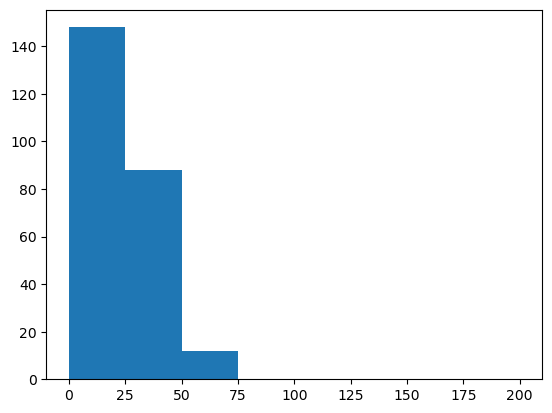

In [22]:
# setting bins to a list
bins_list = [i for i in range(0,225,25)]
plt.hist(liv_pm25["DAILY_AQI_VALUE"], bins = bins_list)

(array([ 5.,  9., 56., 46., 31., 26., 26., 13., 16.,  5.,  5.,  4.,  3.,
         0.,  1.,  2.]),
 array([ 1. ,  5.5, 10. , 14.5, 19. , 23.5, 28. , 32.5, 37. , 41.5, 46. ,
        50.5, 55. , 59.5, 64. , 68.5, 73. ]),
 <BarContainer object of 16 artists>)

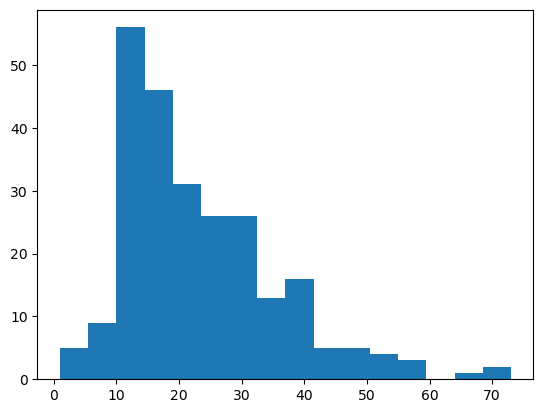

In [23]:
plt.hist(liv_pm25["DAILY_AQI_VALUE"], bins = "sqrt")

### Question 2.4 (2 pts)
Try playing around with the values passed to `bins = ` above. Can you explain how each approach bins the data? (the string argument is a little tricky, but it's documented in the ["Notes" section of this page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html))

*YOUR ANSWER HERE*

*SOLUTION*

*Passing an integer n to `bins = ` just creates n equally sized bins from the data. Passing a list creates bin edges at the list values. The string that we passed, "sqrt", creates equally sized bins, the number of which is equal to the square root of the number of values we're plotting.*

### Question 2.5 (1 pt)
Plot a histogram of AQI for Livermore below. 
1. Play around with different binning strategies and choose the one you like best.
2. Add axis labels and a title.

TypeError: object of type 'ellipsis' has no len()

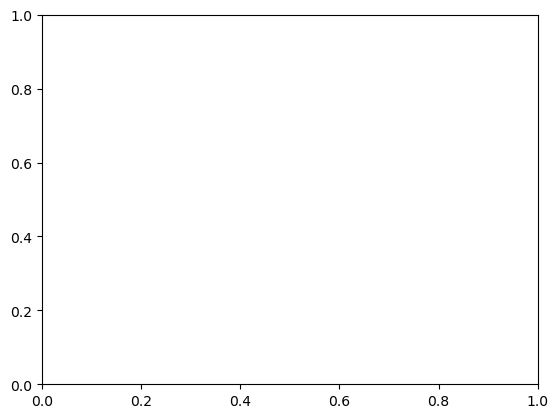

In [24]:
# FILL IN THE CODE BELOW

plt.hist(...)
plt.xlabel(...)
plt.ylabel(...)
plt.title(...)
plt.show()

In [ ]:
# SOLUTION


plt.hist(liv_pm25["DAILY_AQI_VALUE"], bins = "sqrt")
plt.xlabel('AQI')
plt.ylabel('Number of days')
plt.title('Daily AQI Frequency in Livermore, Jan. 1 - Sep. 17, 2023')
plt.show()

### Question 2.6 (1 pt)
Why did you choose the binning strategy you did?

*YOUR ANSWER HERE*

## Question 3: Creating Kernel Density Estimate (KDE) plots
A Kernel Density Estimate (KDE) gives us a probability distribution for a continuous variable from a set of observed data points. Our histogram gives us some information about the distribution of AQI in Livermore - we can see how often we observe an AQI that falls within a certain bin over the first 9 months of 2023. But because histograms are binned and discretize data, the amount of information we can get about a continuous variable will always be limited by the size of the bins.<br>

To understand how to create a KDE, we have to first figure out what "kernel" means. A kernel is a weighting function, and it shares certain mathematical properties with probability density functions (it always evaluates to a non-negative and real value, and its integral - or the area under the curve - equals 1).  Kernels are also *even*, meaning the value they return is independent of the sign of the argument. ([source](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/)).<br>

KDE "applies" the kernel on a grid of points along the support of your data set. Like the edges of bins in a histogram, these points need not correspond to actual observations in your data set.  They are just equally spaced points, as they were in the histogram examples above.  

What does it mean to "apply" the kernel to a point on the support?  Put simply, the kernel measures how many observations in the data set are close by. The kernel returns a higher number if the point is in a crowded part of the support, and a lower value if the point is by itself. Different kernels weight the importance of nearby observations differently.  Some give equal weight to all observations in a range, and others give more weight to observations at the center of the kernel, i.e. the point where you're evaluating the kernel.

What's nice about the construction of KDE kernels is that the collective evaluation of the kernel along all the grid points you chose on the support can be interpreted as a probability distribution. (This is because the kernels are carefully defined in mathematical terms to ensure this resulting property.) That is, if you plot all those kernel evaluations as a function of the points where you evaluated them and then connect those points together, the resulting curve is an estimate of the probability density function of the underlying data. Below is an example of what a KDE might look like for ozone concetrations measured at two locations ([source](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/)).<br>
<img src="images/kernel-density-plot-ozone3.png">

(If this feels a little confusing, don't worry! We'll discuss it as a group in lab, and the next few questions will also help us understand how KDEs work).

### Question 3.1 (2 pts)
Let's use [this tool](https://mathisonian.github.io/kde/) to help us explore KDEs. Play around with the bandwidth and kernel. What happens to the KDE curve (the blue line) when you change the bandwidth? Why? How about the shape of the kernel (the red line)?

*Your answer here*

*SOLUTION*


*Changing the bandwidth changes the "smoothness" of the curve, with a larger bandwidth leading to a smoother curve and a smaller bandwidth leading to a less smooth curve. The higher the bandwidth, the longer the distance from a given point we're willing to include other data points in the kernel. The shape of the kernel impacts the the relative weight of the data points included in the kernel. A uniform kernel will include all data points within the bandwidth and weight them equally, whereas a normal kernel will weight data that fall nearer to a given data point more than data that fall farther away.*

While it's always good to understand the math behind what we're plotting or analyzing, there are thankfully functions and packages that neatly do the math for us. In the Setup cell at the very top, we imported the package `seaborn` as `sns`. [`seaborn`](https://seaborn.pydata.org/) is a data visualization library that builds on `matplotlib`, and it contains convenient functions for a range of plot types, including KDE plots.

Let's start by running the cell below to pull the documentation for [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [ ]:
sns.kdeplot?

### Question 3.2 (1 pt)
From the documentation and from what you know about KDE plots, which argument(s) would you play with to change how the final KDE curve looks?

*YOUR ANSWER HERE*

*SOLUTION* 


*The `kernel`, `gridsize` and `bandwidth` arguments change how the final KDE curve looks, with the `gridsize` being used to adjust the number of points you use.  `bandwidth` influences the width of the kernel.*

Let's draw a KDE plot using `sns.kdeplot()` of AQI in Livermore. In the cell below, we're just passing our data to the function, and using default values for all other arguments. Run the cell to see what the plot looks like.

<Axes: xlabel='DAILY_AQI_VALUE', ylabel='Density'>

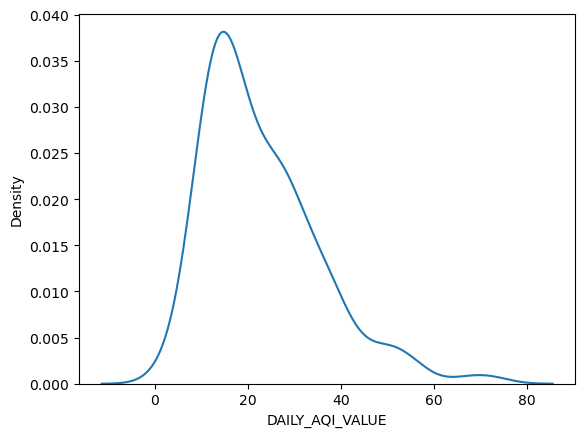

In [25]:
# run this cell
sns.kdeplot(liv_pm25["DAILY_AQI_VALUE"])

### Question 3.3 (2 pts)
Try plotting the KDE plot with different gridsize, kernel, and bandwidth parameters. How does changing the bandwidth parameter impact the plot? Show at least two examples with different bandwidths on the same chart. Add axis labels, a legend, and a title.

You can plot multiple curves on the same plot by calling the `sns.kdeplot()` function twice, i.e.:
```python
sns.kdeplot(...) # plot dataset 1
sns.kdeplot(...) # plot dataset 2
```

You can add a legend by passing a list to the plt.legend() command, i.e.:
``` python
plt.legend(["data label 1", "data label 2"])
```

In [ ]:
# Fill in code below
sns.kdeplot(...) # bw_adjust first option
sns.kdeplot(...) # bw_adjust second option
plt.xlabel(...)
plt.ylabel(...)
plt.title(...)

*YOUR ANSWER HERE*

Text(0.5, 1.0, 'Probability distribution of daily AQI measured in Oakland from January 1 to September 17, 2023')

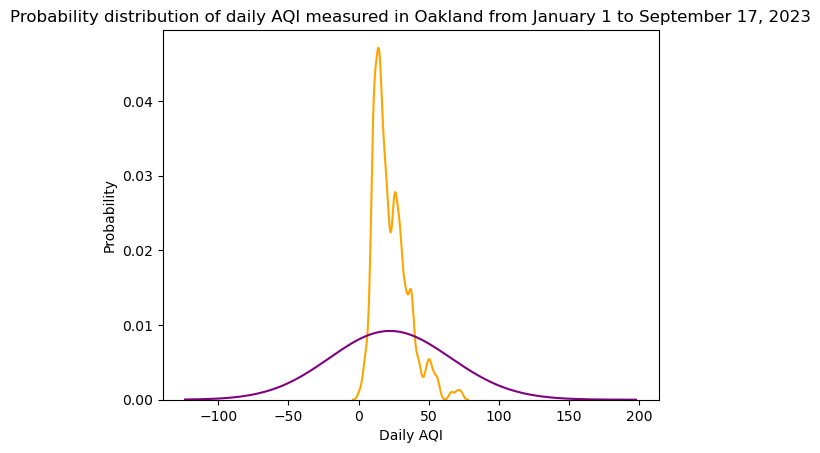

In [26]:
# EXAMPLE SOLUTION


sns.kdeplot(liv_pm25["DAILY_AQI_VALUE"], bw_adjust = 0.4, color = 'orange', label = 'BW = 0.4')
sns.kdeplot(liv_pm25["DAILY_AQI_VALUE"], bw_adjust = 10, color = 'purple', label = 'BW = 10')
plt.xlabel('Daily AQI')
plt.ylabel('Probability')
plt.title('Probability distribution of daily AQI measured in Oakland from January 1 to September 17, 2023')

*SOLUTION*

*Increasing the bandwidth leads to a smoother curve.  But if it's too big it washes out all detail.*

### Question 3.4 (1 pt)
Grab the data from Berkeley Aquatic Park by creating a dataframe that contains just the columns "Date", "Daily Mean PM2.5 Concentration," and "DAILY_AQI_VALUE" for Berkeley Aquatic Park from `alameda_pm25`, and save it to dataframe `berkeley`.

Plot the KDE for Berkeley Aquatic Park on the same plot as Livermore. Make sure to add a legend labelling the two locations, as well as axis labels and a title.

In [ ]:
# Fill in code below
berkeley = ...

sns.kdeplot(...)
sns.kdeplot(...)
plt.xlabel(...)
plt.ylabel(...)
plt.title(...)
plt.legend(...)

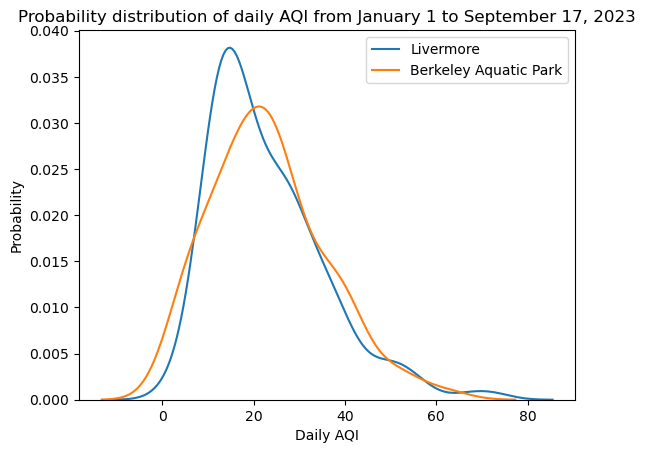

In [27]:
# SOLUTION

berkeley = alameda_pm25.loc[alameda_pm25["Site Name"] == "Berkeley- Aquatic Park", ["Date", 'Daily Mean PM2.5 Concentration',"DAILY_AQI_VALUE"]]

sns.kdeplot(liv_pm25["DAILY_AQI_VALUE"])
sns.kdeplot(berkeley["DAILY_AQI_VALUE"])
plt.xlabel('Daily AQI')
plt.ylabel('Probability')
plt.title('Probability distribution of daily AQI from January 1 to September 17, 2023')
plt.legend(["Livermore", "Berkeley Aquatic Park"])
plt.show()

## Question 4: Box and Whisker Plots
We've tried two different ways to visualize distributions: histograms and probability density functions using Kernel Density Estimates. Another way to show a distribution is a box and whisker plot. It's a much more summarized version of your distribution. The general format of a box and whisker plot is shown below ([source](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_SummarizingData/BS704_SummarizingData8.html)).<br>

<img src = "images/BoxWhisker1.png" width=600>

The "box" shows the bounds of your 25th and 75th percentile (also called the 1st and 3rd quartiles, or the interquartile range (IQR)). Basically, if you ordered your data and then divided it into four bins of equal size, your box would encompass the middle two bins. <br>

The location of the whiskers can vary, but they're intended to show the full range of the data. In Seaborn, the [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function has a parameter called "whis". By default, "whis" is equal to 1.5.  This positions the whiskers at 1.5 times the distance from the median to the 25th and 75th percentiles. In this case we say the whiskers span 1.5 times the "interquartile range."  Many scientific papers use this default.  You can also set `whis = [lo hi]` where `lo` and `hi` are numbers between zero and 100 and represent the position of the whiskers by percentile of the distribution. (For example, `whis = [5, 95]` would position the whiskers at the 5th and 95th percentiles).  <br>

We're going to create a box and whisker plot that shows the distribution of PM2.5 values in two locations: Livermore and Berkeley Aquatic Park. In order to plot box and whisker plots with multiple categories of data (in this case, multiple site locations), we need each category to have the same length. In our case, `liv_pm25` contains 2 more observations than `berkeley` - you can confirm this using the `.shape` method. To standardize the size, we're going to use `pd.merge()` to combine `liv_pm25` and `berkeley`.

### Question 4.1 (1 pt)
What kind of merge (inner, outer, right, or left) should we do so that we retain all of the data in both `liv_pm25` and `berkeley`? If you're not sure, consult the lab 3 notebook.

*YOUR ANSWER HERE*

*SOLUTION*


*We want to do an outer merge, which will keep all of the data from both dataframes.*

### Question 4.2 (1 pt)
Merge `liv_pm25` and `berkeley` on the "Date" field, and save the merged dataframe to `pm25_merged`. Rename the columns to something more descriptive (i.e. a column name that includes the site name).

In [ ]:
#YOUR CODE HERE*
pm25_merged = ...

In [28]:
# SOLUTION

pm25_merged = pd.merge(liv_pm25, berkeley, how = 'outer', on = "Date")
pm25_merged.rename(columns = {"Daily Mean PM2.5 Concentration_x":"Livermore Daily Mean PM2.5",
                              "Daily Mean PM2.5 Concentration_y":"Berkeley Daily Mean PM2.5",
                             "DAILY_AQI_VALUE_x": 'Livermore Daily AQI',
                             "DAILY_AQI_VALUE_y": 'Berkeley Daily AQI'}, inplace = True)

In [29]:
pm25_merged.head()

,Date,Livermore Daily Mean PM2.5,Livermore Daily AQI,Berkeley Daily Mean PM2.5,Berkeley Daily AQI
0,2023-01-01,3.7,15.0,2.7,11.0
1,2023-01-02,2.7,11.0,2.4,10.0
2,2023-01-03,3.6,15.0,4.9,20.0
3,2023-01-04,2.7,11.0,1.7,7.0
4,2023-01-05,4.7,20.0,NaN,NaN


Let's start by running the cell below to plot a basic boxplot using default parameters.

<Axes: >

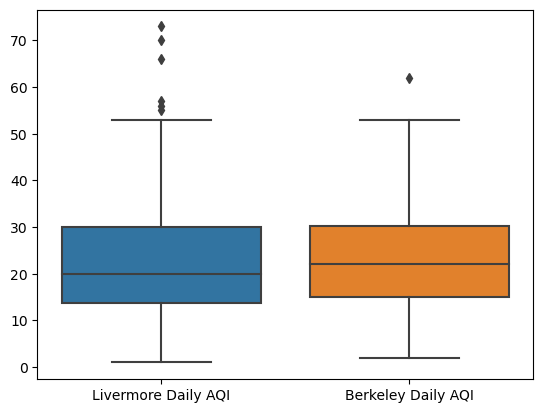

In [30]:
sns.boxplot(data = pm25_merged.iloc[:,2::2])

Let's try using seaborn's syntax for creating and formatting plots. While you can use matplotlib syntax with seaborn, as we did with the KDE plots, seaborn has its own function - [`seaborn.set`](https://seaborn.pydata.org/generated/seaborn.set.html) - that's used for customizing aesthetics. 

[Text(0.5, 0, 'Measurement location'), Text(0, 0.5, 'Daily AQI')]

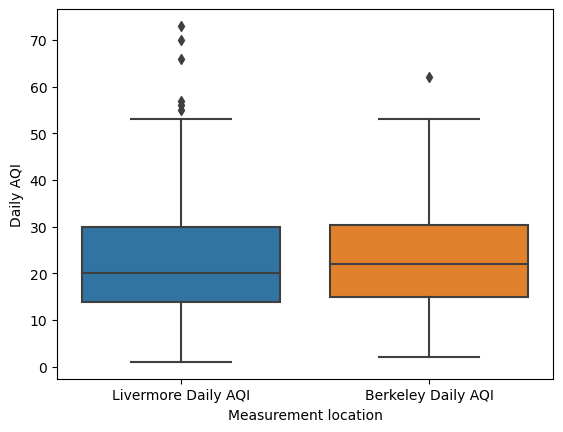

In [31]:
# run this cell
fig = sns.boxplot(data = pm25_merged.iloc[:,2::2])

fig.set(
    xlabel = 'Measurement location', 
    ylabel = 'Daily AQI'
)

### Question 4.3 (1 pt)
Now, using the code in the previous cell as a starting point, change the orientation of the plot from vertical to horizontal (hint: check the `sns.boxplot` documentation) and adding a title.

In [32]:
# YOUR CODE HERE

[Text(0, 0.5, 'Measurement location'),
 Text(0.5, 0, 'Daily AQI'),
 Text(0.5, 1.0, 'Daily AQI from January 1 to September 13, 2020')]

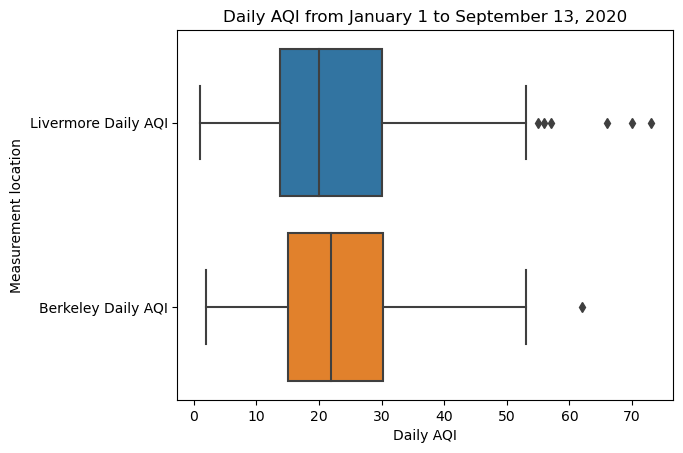

In [33]:
# SOLUTION
fig = sns.boxplot(
    data = pm25_merged.iloc[:,2::2],
    orient = "h"
)

fig.set(
    ylabel = 'Measurement location', 
    xlabel = 'Daily AQI',
    title = "Daily AQI from January 1 to September 13, 2020"
)

### Question 4.4 (2 pts)
Play around with the boxplot parameters - at minimum, try changing the whiskers "whis" parameter in the boxplots. Plot one of your favorite graphs below, and explain how the changes you made might change how the viewer interprets the data.

In [34]:
# your code here

*YOUR ANSWER HERE*

## Question 5: Line graphs
Let's plot AQI throughout 2023 by creating a line graph with date on the x-axis, and AQI on the y-axis, for all sites. We'll start by just calling the `plt.plot()` function with the x and y data as arguments, using default parameters otherwise.<br>

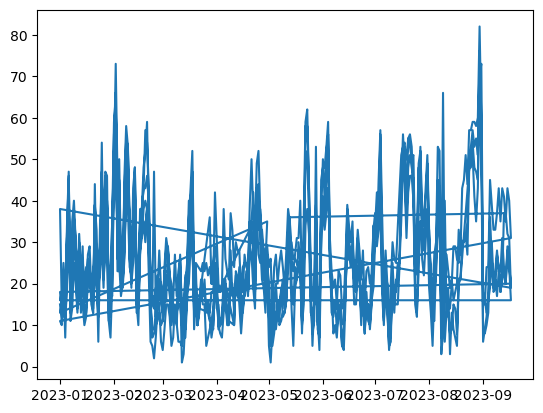

In [35]:
# run this cell
plt.plot(alameda_pm25["Date"].values, alameda_pm25["DAILY_AQI_VALUE"].values)

This plot is a little confusing! The date labels are crowding each other on the x-axis, and it's hard to identify trends since there are so many lines. We also have back and forth lines because matplotlib is plotting all of the different sites at once, so it's joining data from one site in September 2023 to data from another site in January 2023.<br> 

Let's try conditioning our data by assigning colors to the different locations. There are a lot of ways to do this - one method, of looping through all your categories and plotting them in layers, is shown below.<br>

We can start by using a pre-defined color palette from one of [`seaborn`'s color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) (note that this is the only `seaborn` feature we're using in the line plot code - otherwise, we're just using `matplotlib` syntax). I'm going to choose "colorblind", but you can feel free to change the palette. If we use the `sns.color_palette` method, we can see that "colorblind" is a list of RGB color values. We can assign this color palette to the variable `color`.

In [36]:
# run this cell
palette = "colorblind" # you can try changing this to another pre-set palette
sns.color_palette(palette)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [37]:
# run this cell
color = sns.color_palette(palette)

In the cell below, we're going to loop through the unique site names in the full Alameda county dataset, and plot each dataframe subset separately, assigning a color for each from the list of colors provied in the seaborn color palette.

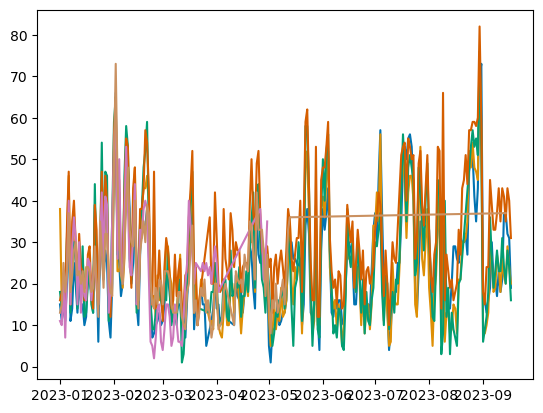

In [38]:
# run this cell
sites = list(alameda_pm25["Site Name"].unique())
for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    plt.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, 
             color = color[sites.index(name)])

That's a bit better, but there are still some odd lines, which cut across the plot. Let's make the plot bigger and add a legend. To do that, we're going to change our syntax slightly from previous examples. We'll create a new figure by calling `plt.figure()`, to which we can pass an argument for `figsize` that specifies the size of the figure.<br> 

A figure in `matplotlib` can include subplots - by convention, these are often given a variable name `ax`. We only need one plot in our figure, so when we call the function [`fig.addsubplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot), we can just use default arguments (check the function documentation for information on how you can add multiple subplots).<br>

Now, instead of using `plt.plot()`, we're going to use `ax.plot()` since `ax` is the variable that represents our plot within the figure `fig`.<br>

After we've plotted all of the lines, we can add axis labels, a legend, and a title by using the respective methods on `ax`.

### Question 5.1 (1 pt)
Replace the ellipses in the code below with values that improve the figure. 

In [40]:
fig = plt.figure(figsize = (...)) # YOUR CODE HERE
ax = fig.add_subplot()

for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    ax.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, 
            color = color[sites.index(name)])

ax.legend(sites) # YOUR CODE HERE
ax.set_xlabel("Date", fontsize = ...) # YOUR CODE HERE
ax.set_ylabel("Daily AQI", fontsize = ...) # YOUR CODE HERE
ax.set_title("Daily AQI, January 1 - September 17, 2023", fontsize = ...) #YOUR CODE HERE
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

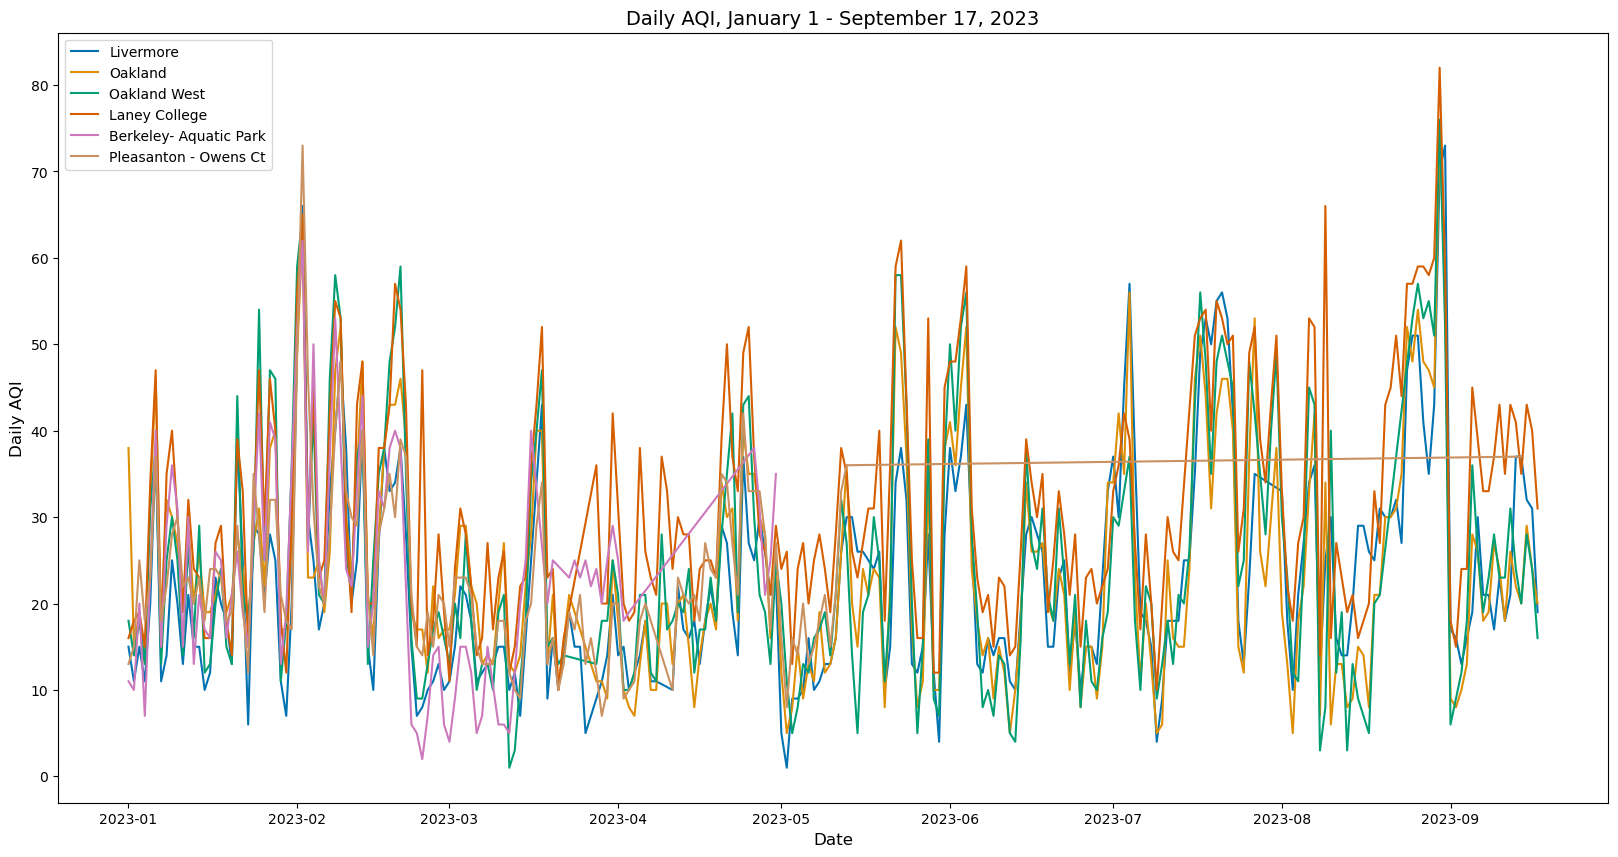

In [41]:
# SOLUTION
fig = plt.figure(figsize = (20,10)) # YOUR CODE HERE
ax = fig.add_subplot()

for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    ax.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, 
            color = color[sites.index(name)])

ax.legend(sites) # YOUR CODE HERE
ax.set_xlabel("Date", fontsize = 12) # YOUR CODE HERE
ax.set_ylabel("Daily AQI", fontsize = 12) # YOUR CODE HERE
ax.set_title("Daily AQI, January 1 - September 17, 2023", fontsize = 14) #YOUR CODE HERE
plt.show()

### Question 5.2 (2 pts)

The plot above is still pretty busy! It's hard to tell what is going on with the lines that cut across the plot. Try outputting a line plot where the data points for just "Berkeley Aquatic Park" are highlighted in a different color than the rest (e.g., Berkeley Aquatic Park in purple, everything else in grey). Use the code in the cell above as a starting point. Make any other tweaks that you think make the plot look better. Do you notice anything about the measurements at Berkeley Aquatic Park compared to the other sites?

In [42]:
# YOUR CODE HERE

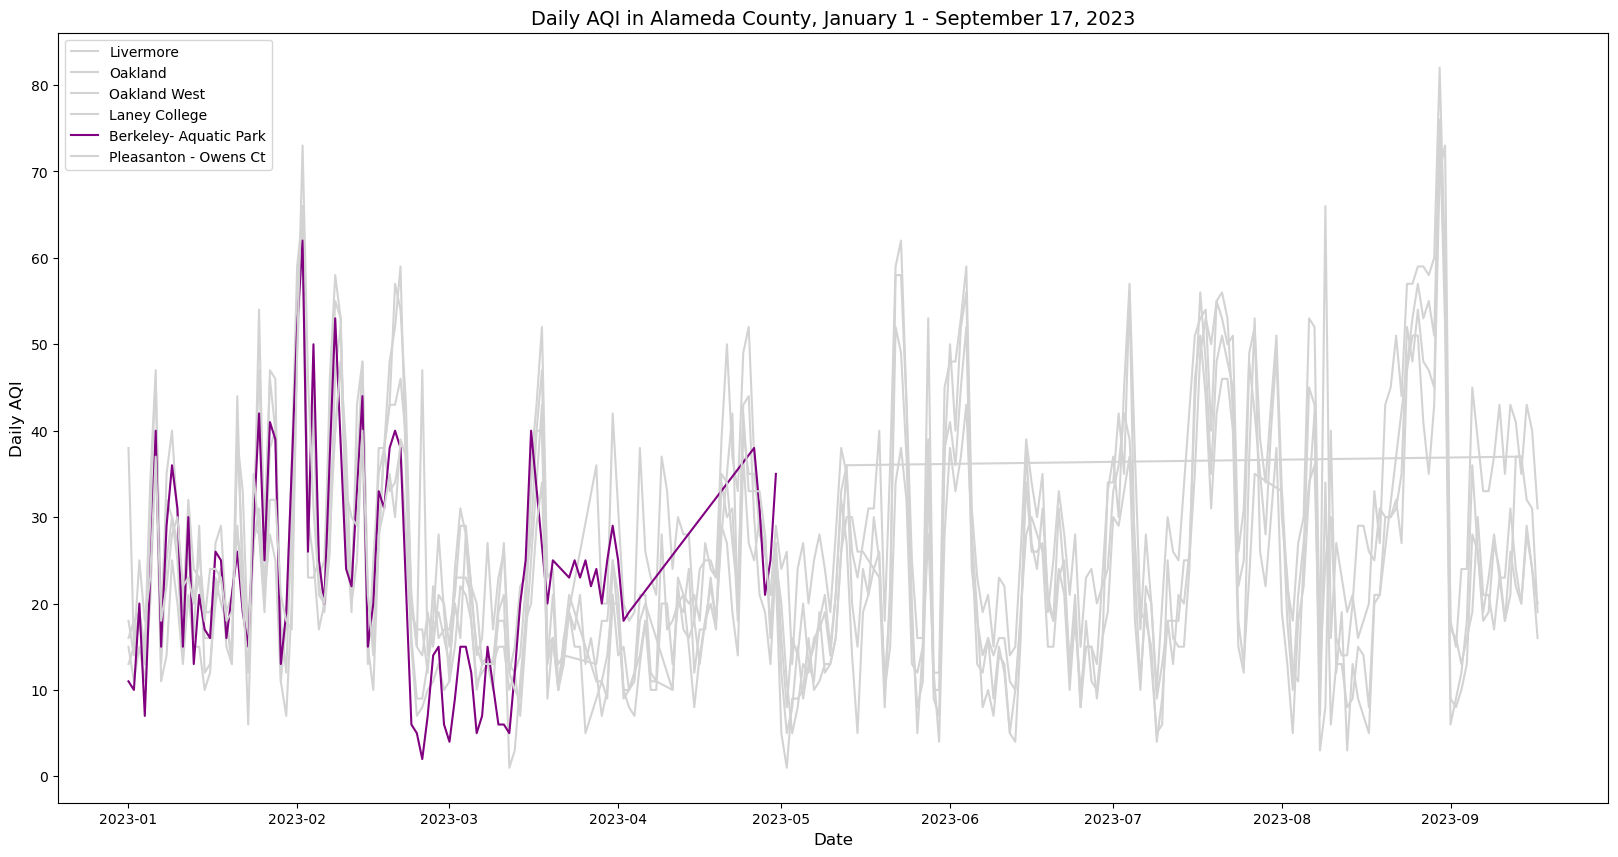

In [44]:
# SOLUTION
highlighted_site = "Berkeley- Aquatic Park"

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()

for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    if name == highlighted_site:
        ax.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, color = 'purple')
    else:
        ax.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, color = 'lightgray')

ax.legend(sites)
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Daily AQI", fontsize = 12)
ax.set_title("Daily AQI in Alameda County, January 1 - September 17, 2023", fontsize = 14)
plt.show()

*YOUR ANSWER HERE*

*EXAMPLE SOLUTION*

*Berkeley Aquatic Park follows the same general trend as the other sites for AQI over time. Under normal conditions, it seems to be on the higher end of AQI, but during extreme events, it is sometimes on the lower side.*

### Question 5.3 (2 pts)

The plot above still has one location with a line cutting through the plot. Use your code above to output a line plot where the data points for just "Pleasanton – Owens Ct" are highlighted in a different color than the rest. 

Looking at your graph, what is one possible explanation for this odd display of data? Can you find any information if you search online? 

In [45]:
# YOUR CODE HERE

*YOUR ANSWER HERE*

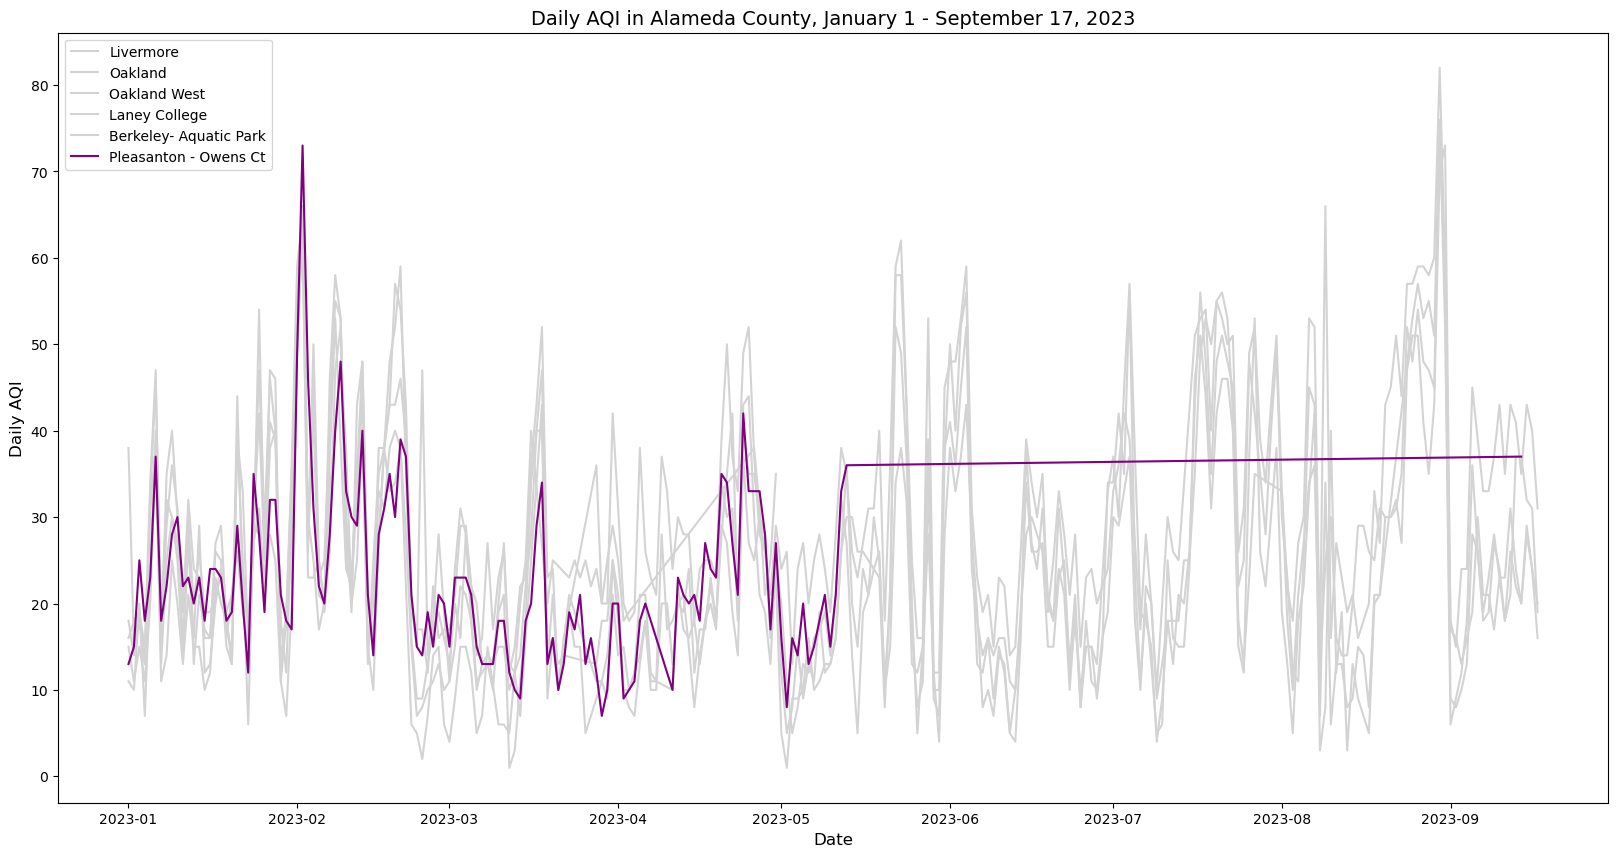

In [46]:
# SOLUTION
highlighted_site = "Pleasanton - Owens Ct"

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()

for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    if name == highlighted_site:
        ax.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, color = 'purple')
    else:
        ax.plot(site_df["Date"].values, site_df["DAILY_AQI_VALUE"].values, color = 'lightgray')

ax.legend(sites)
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Daily AQI", fontsize = 12)
ax.set_title("Daily AQI in Alameda County, January 1 - September 17, 2023", fontsize = 14)
plt.show()

*SOLUTION*
The websites for Berkeley Aquatic Park and Pleasanton show that the data has not been collected (no data) for a few months. The Pleasanton data show that they seme to upload a standard value every day. 

### Question 5.4 (1pt)

Suppose that you want to work with this data further to investigate PM2.5 related to demographic data. How would you handle the data from Berkeley Aquatic Park and Pleasanton - Owens Ct.? Consider if you would want to include these datapoints, or what the impacts would be if you did not include the data. Do not provide any code for this question, provide a brief but concrete explanation of what you would do with these data. 

*YOUR ANSWER HERE*

*SOLUTION* Any number of answers would work here. Overall we are guaging if students can use critical thinking skills to better explain working with real world data even in the face of challenges. 

# Hooray, you're done! 

Please remember to submit your lab work, after clicking Kernel -> Restart & Run All, in .html and .ipynb format on bCourses.